<a href="https://colab.research.google.com/github/silver96/prj_10x10/blob/main/project_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping

In [ ]:
X_train, X_test, Y_train, Y_test = np.load(
    '/content/datasets/10x10_data_max_13_size_20320_2.npy',
    allow_pickle=True)
#max: 한 행의(리스트 글자의) 최대 길이
#size: 차원 수
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(81468, 13)
(9052, 13)
(81468, 10)
(9052, 10)


#모델생성

In [ ]:
model = Sequential()
#X_pad로 사이즈 통일시킨 데이터를 embedding layer가 원핫인코딩+벡터라이징 처리해줌
#벡터라이징: 각 인덱스별 의미부여를 벡터공간이라는 개념을 도입해 처리
model.add(Embedding(20320, 300, input_length=13))
#차원수 20320를 차원수 300으로 낮추고 input_length는 max최대값인 13으로 입력
model.add(Conv1D(512, kernel_size=5, 
            padding='same', activation='relu'))#1차원 컨볼루션=> conv1d, 2차원 컨볼루션=>conv2d
model.add(MaxPool1D(pool_size=1))
#conv다음에는 maxpool함께 감
model.add(LSTM(128, activation='tanh',
               return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh',
               return_sequences=True))
model.add(Dropout(0.1))
# model.add(LSTM(64, activation='tanh'))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))#y값개수: 10(카테고리개수)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)  
# 5 에포크 동안 해당 값이 좋아지지 않으면 학습을 중단. 보통 5번에서 7번 정도 줌
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 300)           6096000   
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 512)           768512    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 512)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 13, 128)           328192    
_________________________________________________________________
dropout (Dropout)            (None, 13, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 13, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 64)            0

In [ ]:
#모델 환경설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
#metrics 정밀도 평가, 
#모델 학습
fit_hist = model.fit(X_train, Y_train, batch_size=100, epochs=50, 
                     validation_data=(X_test, Y_test),
                     callbacks=[early_stopping])

Epoch 1/50
815/815 [==============================] - 89s 67ms/step - loss: 0.6209 - accuracy: 0.7980 - val_loss: 0.3462 - val_accuracy: 0.8938
Epoch 2/50
815/815 [==============================] - 53s 65ms/step - loss: 0.2374 - accuracy: 0.9282 - val_loss: 0.3204 - val_accuracy: 0.9041
Epoch 3/50
815/815 [==============================] - 53s 65ms/step - loss: 0.1609 - accuracy: 0.9503 - val_loss: 0.3309 - val_accuracy: 0.9031
Epoch 4/50
815/815 [==============================] - 53s 66ms/step - loss: 0.1248 - accuracy: 0.9606 - val_loss: 0.3505 - val_accuracy: 0.9052
Epoch 5/50
815/815 [==============================] - 53s 65ms/step - loss: 0.1015 - accuracy: 0.9667 - val_loss: 0.3588 - val_accuracy: 0.9052
Epoch 6/50
815/815 [==============================] - 54s 66ms/step - loss: 0.0837 - accuracy: 0.9721 - val_loss: 0.4089 - val_accuracy: 0.9030
Epoch 7/50
815/815 [==============================] - 53s 65ms/step - loss: 0.0704 - accuracy: 0.9765 - val_loss: 0.4134 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, Y_test)
print(score[1])

283/283 [==============================] - 2s 8ms/step - loss: 0.5130 - accuracy: 0.9142
0.9141626358032227


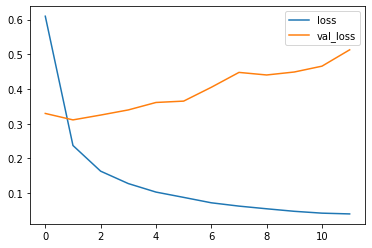

In [ ]:
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/models/10x10_classfication_{}.h5'.format(score[1]))